# 비지도학습 군집분석: 정답지가 없는 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/shopping-data.csv")

In [4]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 군집분석 (계층적 군집, 비계층적 군집)
* 계층적 군집
    * 비지도학습
    * 데이터가 적을 때 사용
    * 거리 계산 지표: 유클리드, 맨하탄, 코사인 유사도
* 계층적 군집 5가지 
    * 단일 연결법 (single linage), 최단연결법: 군집과 군집 사이에서 가장 가까운 데이터를 기준으로 묶음
    * 완전연결법 (complite linage), 최장연결법: 군집과 군집 사이에서 가장 먼 데이터를 기준으로 묶음
    * 평균연결법 (average linkage): 군집과 군집 사이의 모든 데이터의 평균 데이터로 계산 (이상치에 덜 민감)
    * 중심연결법 (centroid linkage): 군집과 중심점 사이의 거리를 거리로 측정한 방법, 계산이 빠름
    * 와드연결법(ward linkage): 군집내 오차가 최소가 되는 데이터로 계산, 군집내 분산이 최소, 조밀한 군집
* 계층적 군집으로 시각화는 덴드로그램으로 한다.

In [7]:
import scipy.cluster.hierarchy as shc

In [8]:
data = pd.get_dummies(data, drop_first=True)
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [9]:
data2 = data.copy()

In [10]:
data = data.drop('CustomerID', axis=1)

In [11]:
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


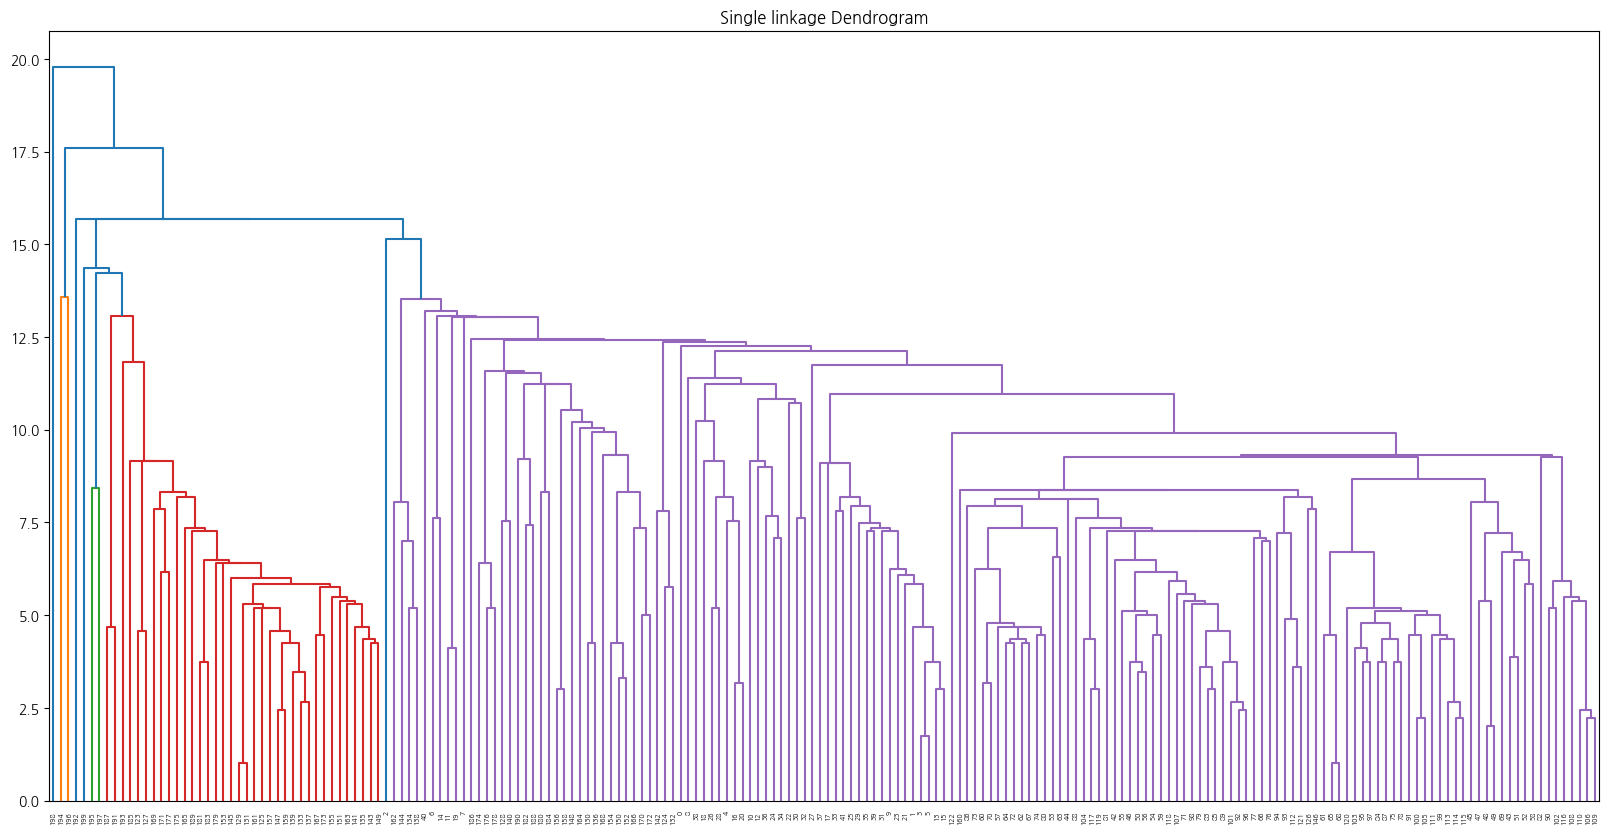

In [13]:
plt.figure(figsize=(20, 10))
plt.title('Single linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='single'))
plt.show()

* 완전연결법 / 최장연결법

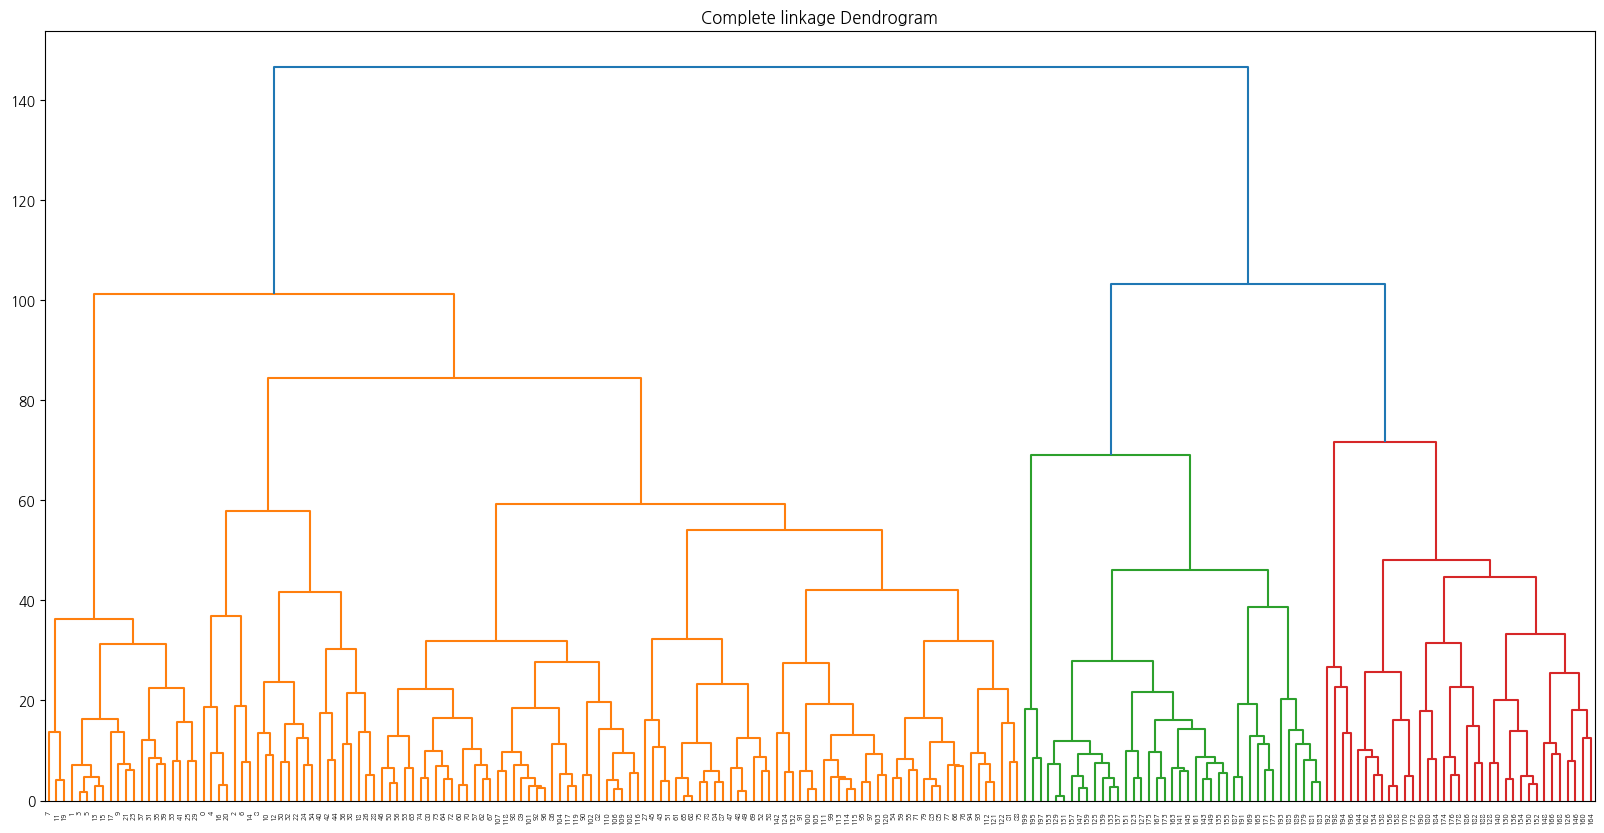

In [14]:
plt.figure(figsize=(20, 10))
plt.title('Complete linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='complete'))
plt.show()

평균연결법

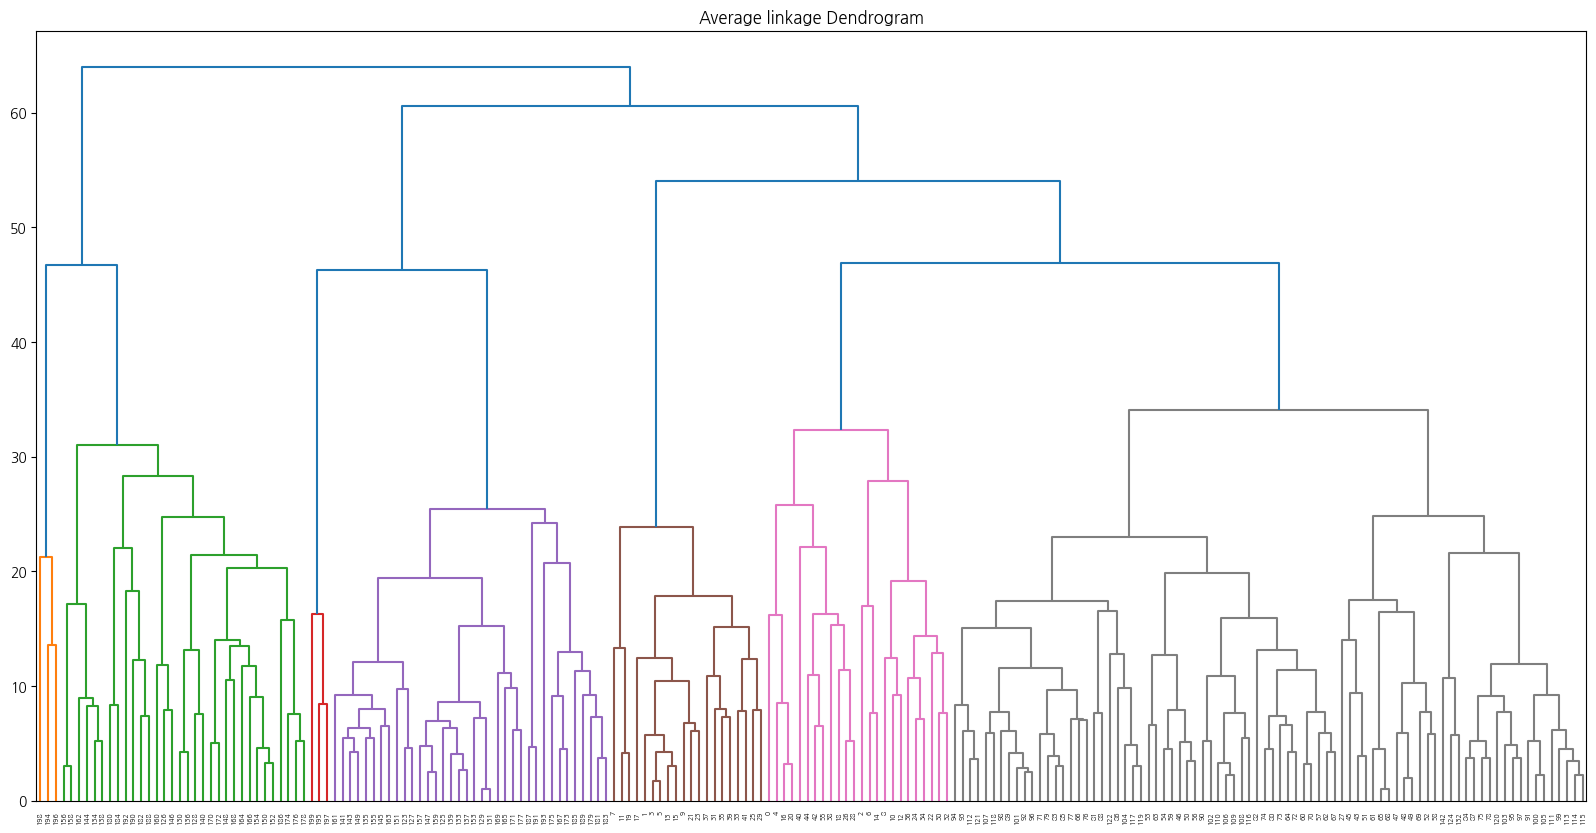

In [15]:
plt.figure(figsize=(20, 10))
plt.title('Average linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='average'))
plt.show()

중심연결법(centroid)

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Centroid linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='Centroid'))
plt.show()

와드 연결법

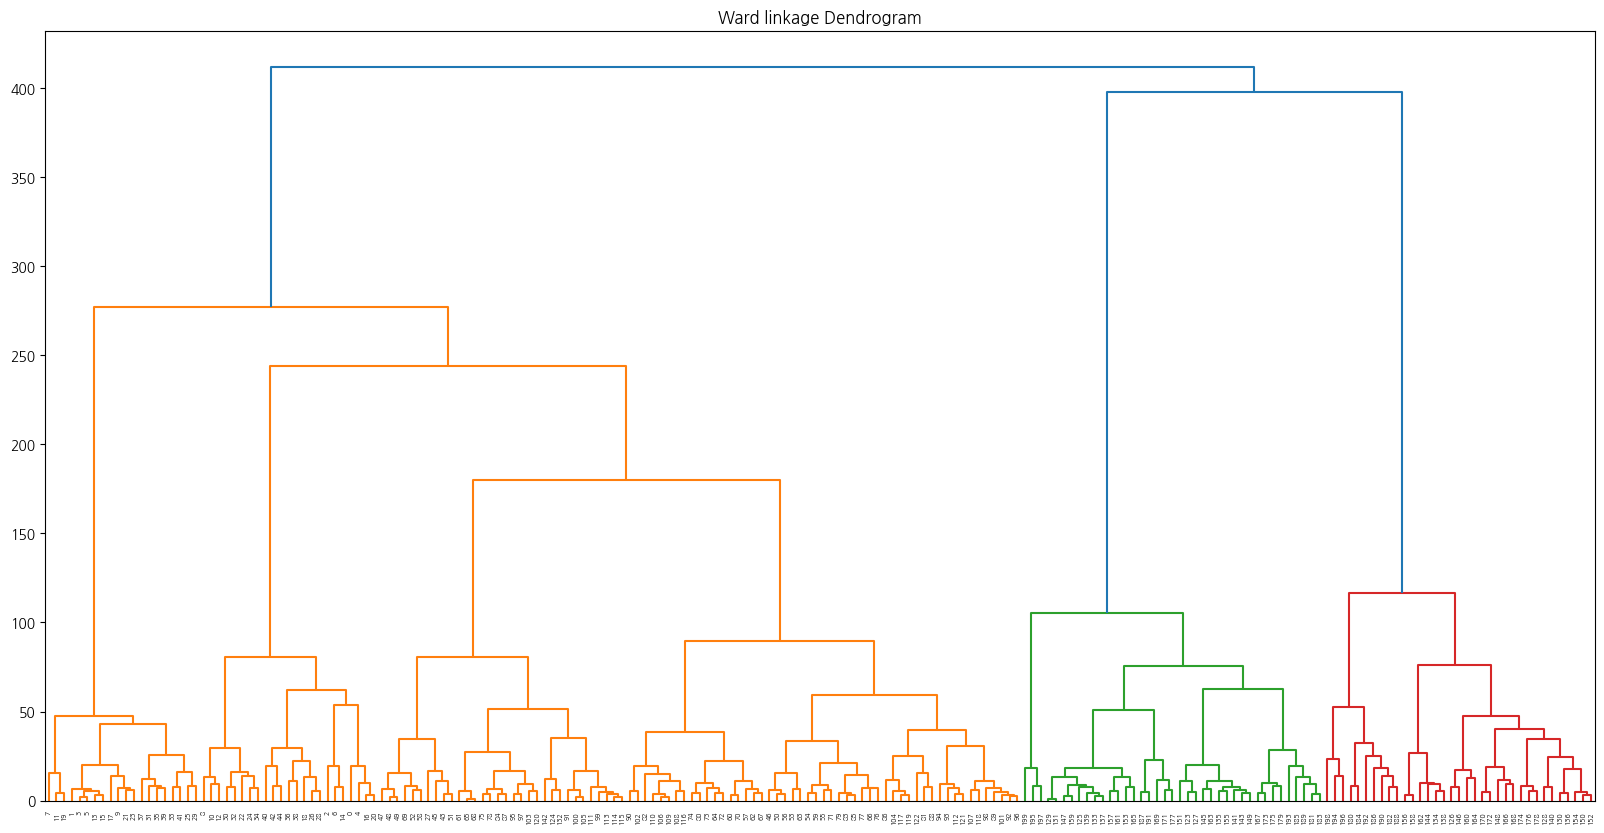

In [17]:
plt.figure(figsize=(20, 10))
plt.title('Ward linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [18]:
from sklearn.cluster import AggIomerativeClustering

ImportError: cannot import name 'AggIomerativeClustering' from 'sklearn.cluster' (C:\Users\vbak0\miniforge3\envs\fintech\lib\site-packages\sklearn\cluster\__init__.py)

In [19]:
single = AgglomerativeClustering(n_cluster=3, metric='euclidean', linkage='single')
result = single.fit_predict(data)
result

NameError: name 'AgglomerativeClustering' is not defined

In [20]:
data2['single'] = result
data2

NameError: name 'result' is not defined

In [ ]:
data = pd.read_csv("")

# 군집의 최적 개수 정하기
* elbow method
* 실루엣 지수

* 군집분석의 응집도 (요소들이 얼마나 모여있는지 판단하는 자료)
    * inertia_ 값이 작을 수록 군집이 잘 형성됨
* elbow method: inertia_(응집도)를 출력하고 시각화한 뒤 응집도의 감소폭이 급격한 변화가 시작되는 최적 군집의 수로 채택하는 방법

In [21]:
print(km.inertia_)

NameError: name 'km' is not defined

In [ ]:
inertia = []
for i in range(1, 21):
    km = KMeans(n_cluster=i, random_state=42)
    km.fit(ss_data)
    result = inertia.append(km.inertia_)

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=range(1, 21), y=inertia, marker='o', markersize = 10, markerfacecolor='red')
plt.show()

* 실루엣 지수를 출력해서 최적 군집 개수 구하기
* 실루엣 지수를 구하기 위해서는 최소 2개 이상의 군집이 필요
* 실루엣 점수가 가장 높은 클러스터 개수가 최적 군집 개수 (1에 가까울 수록 좋음)

In [22]:
from sklearn.metrics import silhouette_score

In [24]:
sil_scores = []
for i in range(2, 21):
    km2 = KMeans(n_cluster=i, random_state=42)
    km2.fit(ss_data)
    labels = km2.labels_
    sil_scores.append(silhouette_score(ss_data, labels))
sil_scores

NameError: name 'KMeans' is not defined

KeyError: 'y'

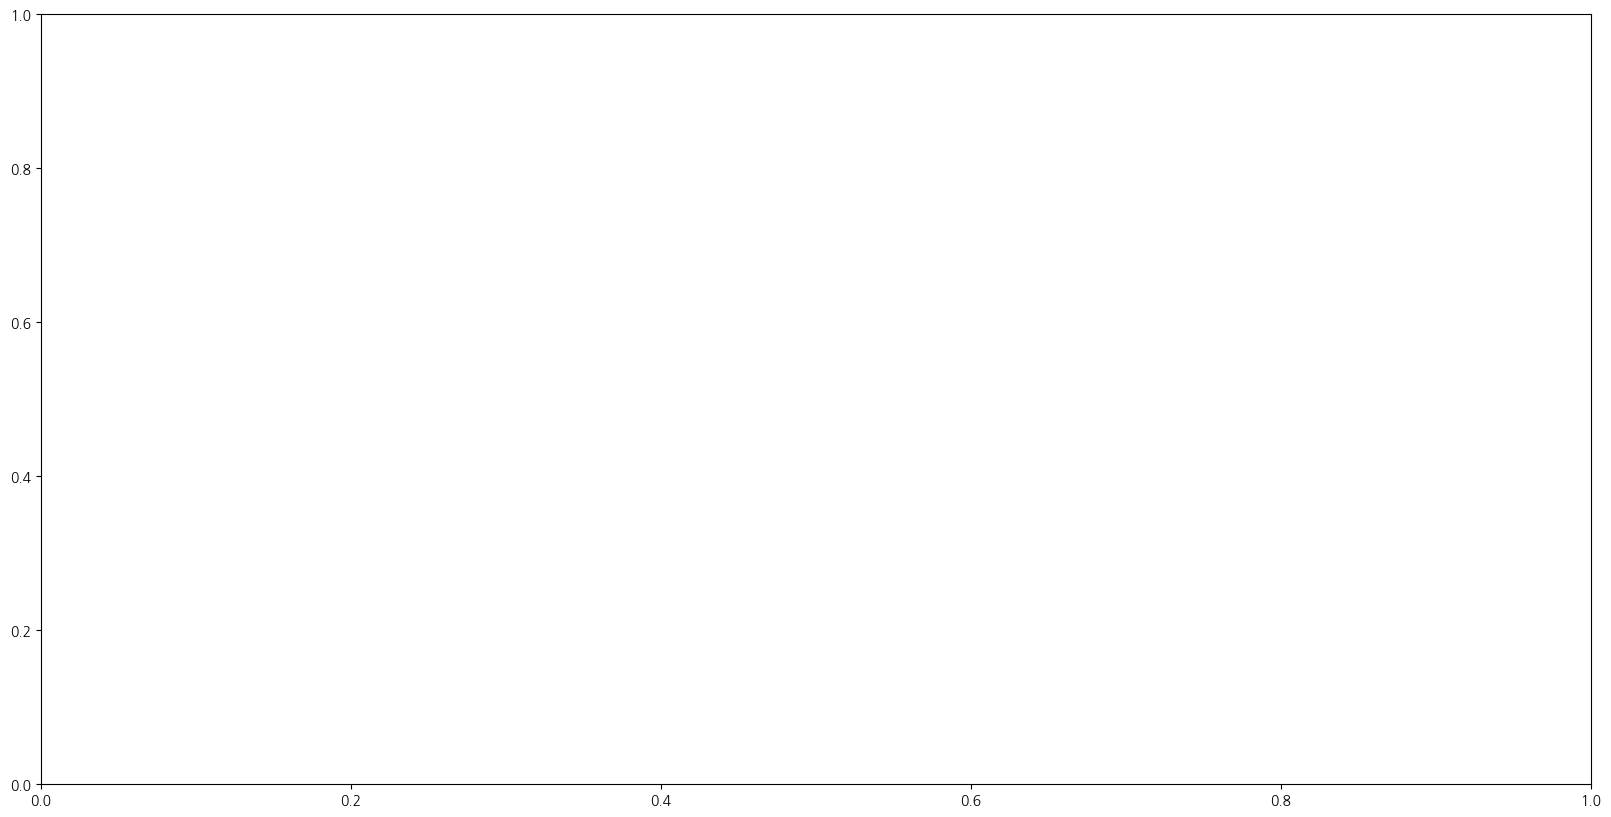

In [26]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=range(2, 21), y=sil_scores, marker='o', markersize = 10, markerfacecolor='red')
plt.show()